<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Write your code here
!pip install pyLDAvis
!pip install ipympl
%matplotlib ipympl
import pandas as pd
import re
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora
from pprint import pprint
import nltk
nltk.download('stopwords')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
movie_reviews_df = pd.read_csv('sentiment_movie_review.csv')
movie_reviews_df

,Review Title,Review Date,Review Description,sentiment_category
0,"A scene between an intelligent raccoon, a rabb...",10 May 2023,"Guardians of the Galaxy Volume 3 is chaotic, w...",positive
1,A Fitting and Heartfelt End to the Trilogy,4 May 2023,Having sat through some phase 4 films that fai...,positive
2,One of the Best MCU Trilogies,8 May 2023,"Up to this point, there has been one trilogy i...",positive
3,"This is one of the best MCU movies, hands down",7 May 2023,"""There is no God. That's why I stepped in."" I ...",positive
4,I am groot,3 May 2023,"Firstly Adam warlock's intro was marvelous, wh...",positive
...,...,...,...,...
9995,All heroes start somewhere,3 May 2023,"""Guardians of the Galaxy Vol. 3"" is the third ...",positive
9996,"It's different, but not necessarily in a good ...",5 May 2023,Guardians 3 is not what I has hoping for; that...,negative
9997,Each Hero has a story,4 May 2023,James Gunn is one of the few filmmakers who ha...,positive
9998,Good...but oversold and underwhelming.,3 May 2023,Struggling to find the right word(s) to sum th...,positive


In [3]:
# Preprocess the text data and printing the text
movie_reviews_df['clean_text'] = movie_reviews_df['Review Title'].map(lambda x: re.sub('[,\.!?]', '', x))
movie_reviews_df['clean_text'] = movie_reviews_df['clean_text'].map(lambda x: x.lower())
english_stop_words = stopwords.words('english')
print(movie_reviews_df['clean_text'].head())

0    a scene between an intelligent raccoon a rabbi...
1           a fitting and heartfelt end to the trilogy
2                        one of the best mcu trilogies
3        this is one of the best mcu movies hands down
4                                           i am groot
Name: clean_text, dtype: object


In [4]:
def tokenize_and_remove_stopwords(sentences):
    for sentence in sentences:
        # Tokenize and remove punctuation
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(tokens):
    # Remove stopwords from tokenized text
    return [[word for word in simple_preprocess(str(doc)) if word not in english_stop_words] for doc in tokens]

In [5]:
# Tokenize and remove stopwords from the text data
tokenized_reviews = list(tokenize_and_remove_stopwords(movie_reviews_df['clean_text'].values))
clean_reviews = remove_stopwords(tokenized_reviews)

In [6]:
print(clean_reviews[:1][0][:30])

['scene', 'intelligent', 'raccoon', 'rabbit', 'artificial', 'legs', 'walrus', 'wheels', 'otter', 'metal', 'arms', 'made', 'cry']


In [7]:
# Create a dictionary for the cleaned text
dictionary = corpora.Dictionary(clean_reviews)

# Create a corpus (term-document frequency)
corpus = [dictionary.doc2bow(text) for text in clean_reviews]

# Set the number of topics
num_topics = 10

# Train the LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics)

# Print the top 10 keywords for each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.089*"incredible" + 0.087*"heartfelt" + 0.086*"trilogy" + 0.086*"fitting" '
  '+ 0.086*"end" + 0.075*"start" + 0.072*"heroes" + 0.072*"somewhere" + '
  '0.014*"rocket" + 0.014*"love"'),
 (1,
  '0.056*"guardians" + 0.050*"send" + 0.046*"perfect" + 0.043*"vile" + '
  '0.043*"history" + 0.043*"villain" + 0.043*"mcu" + 0.038*"metal" + '
  '0.037*"made" + 0.037*"intelligent"'),
 (2,
  '0.105*"start" + 0.090*"emotional" + 0.088*"energetic" + 0.074*"marvel" + '
  '0.073*"roots" + 0.073*"return" + 0.073*"finally" + 0.032*"somewhere" + '
  '0.031*"heroes" + 0.013*"love"'),
 (3,
  '0.079*"goodbye" + 0.079*"dark" + 0.079*"beautifully" + 0.079*"goofy" + '
  '0.062*"prepared" + 0.062*"traumatic" + 0.062*"would" + 0.061*"emotional" + '
  '0.061*"outstanding" + 0.061*"payoff"'),
 (4,
  '0.126*"best" + 0.081*"marvel" + 0.081*"year" + 0.081*"film" + '
  '0.080*"goodbut" + 0.080*"oversold" + 0.080*"underwhelming" + 0.062*"mcu" + '
  '0.045*"one" + 0.039*"trilogies"'),
 (5,
  '0.071*"really" + 0

In [8]:
# installed the bertopic library
! pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 59.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 18.7 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (7

In [9]:
# imported the required libraries
from bertopic import BERTopic
# converted the data into list
movies_data = movie_reviews_df.clean_text.to_list()
# created a topic model using English language words
topic_model = BERTopic(language="english")

# come up with the topics count vs. their frequencies
topics, probs = topic_model.fit_transform(movies_data)
# for given data with 100 rows, BERTModel comes up with 3 topics as shown below & their frequencies
topic_model.get_topic_info()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,Topic,Count,Name,Representation,Representative_Docs
0,-1,265,-1_hands_movies_down_is,"[hands, movies, down, is, finally, roots, retu...",[this is one of the best mcu movies hands down...
1,0,400,0_with_an_artificial_cry,"[with, an, artificial, cry, intelligent, arms,...",[a scene between an intelligent raccoon a rabb...
2,1,400,1_messy_enjoyable_sendoff_but,"[messy, enjoyable, sendoff, but, , , , , , ]","[a messy but enjoyable send-off, a messy but e..."
3,2,400,2_gracious_goodness__,"[gracious, goodness, , , , , , , , ]","[goodness gracious, goodness gracious, goodnes..."
4,3,400,3_oversold_goodbut_underwhelming_and,"[oversold, goodbut, underwhelming, and, , , , ...","[goodbut oversold and underwhelming, goodbut o..."
5,4,400,4_story_hero_has_each,"[story, hero, has, each, , , , , , ]","[each hero has a story, each hero has a story,..."
6,5,400,5_necessarily_good_different_way,"[necessarily, good, different, way, not, its, ...",[it's different but not necessarily in a good ...
7,6,400,6_somewhere_heroes_all_start,"[somewhere, heroes, all, start, , , , , , ]","[all heroes start somewhere, all heroes start ..."
8,7,400,7_finale_poignant_heartfelt_and,"[finale, poignant, heartfelt, and, , , , , , ]","[a poignant and heartfelt finale, a poignant a..."
9,8,400,8_outstanding_payoff_emotional_,"[outstanding, payoff, emotional, , , , , , , ]","[outstanding emotional payoff, outstanding emo..."


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [10]:
# Write your code here
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
review_df = pd.read_csv('sentiment_movie_review.csv')

In [12]:
tfidf_vector = TfidfVectorizer()
X_tfidf = tfidf_vector.fit_transform(review_df['Review Description'])
print(X_tfidf.shape)

(10000, 1735)


In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
mnb = MultinomialNB()
svm = LinearSVC()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf,
                                                    review_df['sentiment_category'],
                                                    test_size=0.2,
                                                    random_state=42)
model_mnb = mnb.fit(x_train,y_train)

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_mnb,y_test))
print(classification_report(y_test,y_pred_mnb))

Accuracy 1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       166
    positive       1.00      1.00      1.00      1834

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=7)
print("using MNB",scores.mean())

using MNB 1.0


In [17]:
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)

In [18]:
classification_report(y_test,y_pred_svm)

'              precision    recall  f1-score   support\n\n    negative       1.00      1.00      1.00       166\n    positive       1.00      1.00      1.00      1834\n\n    accuracy                           1.00      2000\n   macro avg       1.00      1.00      1.00      2000\nweighted avg       1.00      1.00      1.00      2000\n'

In [19]:
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))

Accuracy 1.0


In [20]:
scores = cross_val_score(svm, x_test, y_test, cv=7)
print("using svm",scores.mean())

using svm 1.0


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [21]:
# Write your code here
df_train = pd.read_csv("test.csv")
df_test = pd.read_csv("train.csv")
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [22]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

df_train = df_train.select_dtypes(include=['number']).interpolate().dropna()
df_test = df_test.select_dtypes(include=['number']).interpolate().dropna()

x_training_data = df_test.drop(['SalePrice','Id'], axis=1)
y_training_data = np.log(df_test.SalePrice)


x_train, x_test, y_train, y_test = train_test_split(x_training_data,y_training_data,random_state = 21, test_size=0.2)


regression = LinearRegression()
regression.fit(x_train,y_train)

y_pred = regression.predict(x_test)

In [24]:
print('Linear Regression R squared": %.4f' % regression.score(x_test, y_test))

Linear Regression R squared": 0.8493


In [25]:
# removed null rows from the other columns
df_train = df_train.select_dtypes(include=['number']).dropna()
df_test = df_test.select_dtypes(include=['number']).dropna()

In [26]:
df_train.count()

Id               1459
MSSubClass       1459
LotFrontage      1459
LotArea          1459
OverallQual      1459
OverallCond      1459
YearBuilt        1459
YearRemodAdd     1459
MasVnrArea       1459
BsmtFinSF1       1459
BsmtFinSF2       1459
BsmtUnfSF        1459
TotalBsmtSF      1459
1stFlrSF         1459
2ndFlrSF         1459
LowQualFinSF     1459
GrLivArea        1459
BsmtFullBath     1459
BsmtHalfBath     1459
FullBath         1459
HalfBath         1459
BedroomAbvGr     1459
KitchenAbvGr     1459
TotRmsAbvGrd     1459
Fireplaces       1459
GarageYrBlt      1459
GarageCars       1459
GarageArea       1459
WoodDeckSF       1459
OpenPorchSF      1459
EnclosedPorch    1459
3SsnPorch        1459
ScreenPorch      1459
PoolArea         1459
MiscVal          1459
MoSold           1459
YrSold           1459
dtype: int64

In [27]:
df_test.count()

Id               1460
MSSubClass       1460
LotFrontage      1460
LotArea          1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
MasVnrArea       1460
BsmtFinSF1       1460
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
1stFlrSF         1460
2ndFlrSF         1460
LowQualFinSF     1460
GrLivArea        1460
BsmtFullBath     1460
BsmtHalfBath     1460
FullBath         1460
HalfBath         1460
BedroomAbvGr     1460
KitchenAbvGr     1460
TotRmsAbvGrd     1460
Fireplaces       1460
GarageYrBlt      1460
GarageCars       1460
GarageArea       1460
WoodDeckSF       1460
OpenPorchSF      1460
EnclosedPorch    1460
3SsnPorch        1460
ScreenPorch      1460
PoolArea         1460
MiscVal          1460
MoSold           1460
YrSold           1460
SalePrice        1460
dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

df_train = df_train.select_dtypes(include=['number']).interpolate().dropna()
df_test = df_test.select_dtypes(include=['number']).interpolate().dropna()

x_training_data = df_test.drop(['SalePrice','Id'], axis=1)
y_training_data = np.log(df_test.SalePrice)


x_train, x_test, y_train, y_test = train_test_split(x_training_data,y_training_data,random_state = 21, test_size=0.2)


regression = LinearRegression()
regression.fit(x_train,y_train)

y_pred = regression.predict(x_test)

In [29]:
print('Linear Regression R squared": %.4f' % regression.score(x_test, y_test))

Linear Regression R squared": 0.8493


In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin = mean_squared_error(np.exp(y_pred), y_test)
lin_r = np.sqrt(lin)
print(lin_r)

195747.28015953413


In [31]:
results = {"Predicted_Prices":np.exp(y_pred),"Actual_Prices":np.exp(y_test)}
df_val = pd.DataFrame(results)
df_val["Percentage_Difference"] = round(abs((df_val["Predicted_Prices"] - df_val["Actual_Prices"]) / df_val["Actual_Prices"]) * 100,2)
df_val

,Predicted_Prices,Actual_Prices,Percentage_Difference
880,156677.762126,157000.0,0.21
605,229973.921577,205000.0,12.18
1166,245358.948864,245350.0,0.00
216,218109.586021,210000.0,3.86
970,86909.329260,135000.0,35.62
...,...,...,...
218,231419.797074,311500.0,25.71
1228,311321.804719,367294.0,15.24
1007,93234.996099,88000.0,5.95
575,109041.447359,118500.0,7.98


In [32]:
!pip install matplotlib==3.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl size=11757608 sha256=5ba439b4f4cb70a5bb14db9ec830a69e13f06dfc0d1379bbf0efc8b719787a2f
  Stored in directory: /root/.cache/pip/wheels/a7/83/5a/c704868d367ace343ac89b928f3d937313a5b5fb5731483705
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
bigframes 1.2.0 requires matplotlib>=3.7.1, but you have matplotlib 3.1.3 which is incompatible.
ipympl 0.9.4 requires matplotlib<4,>

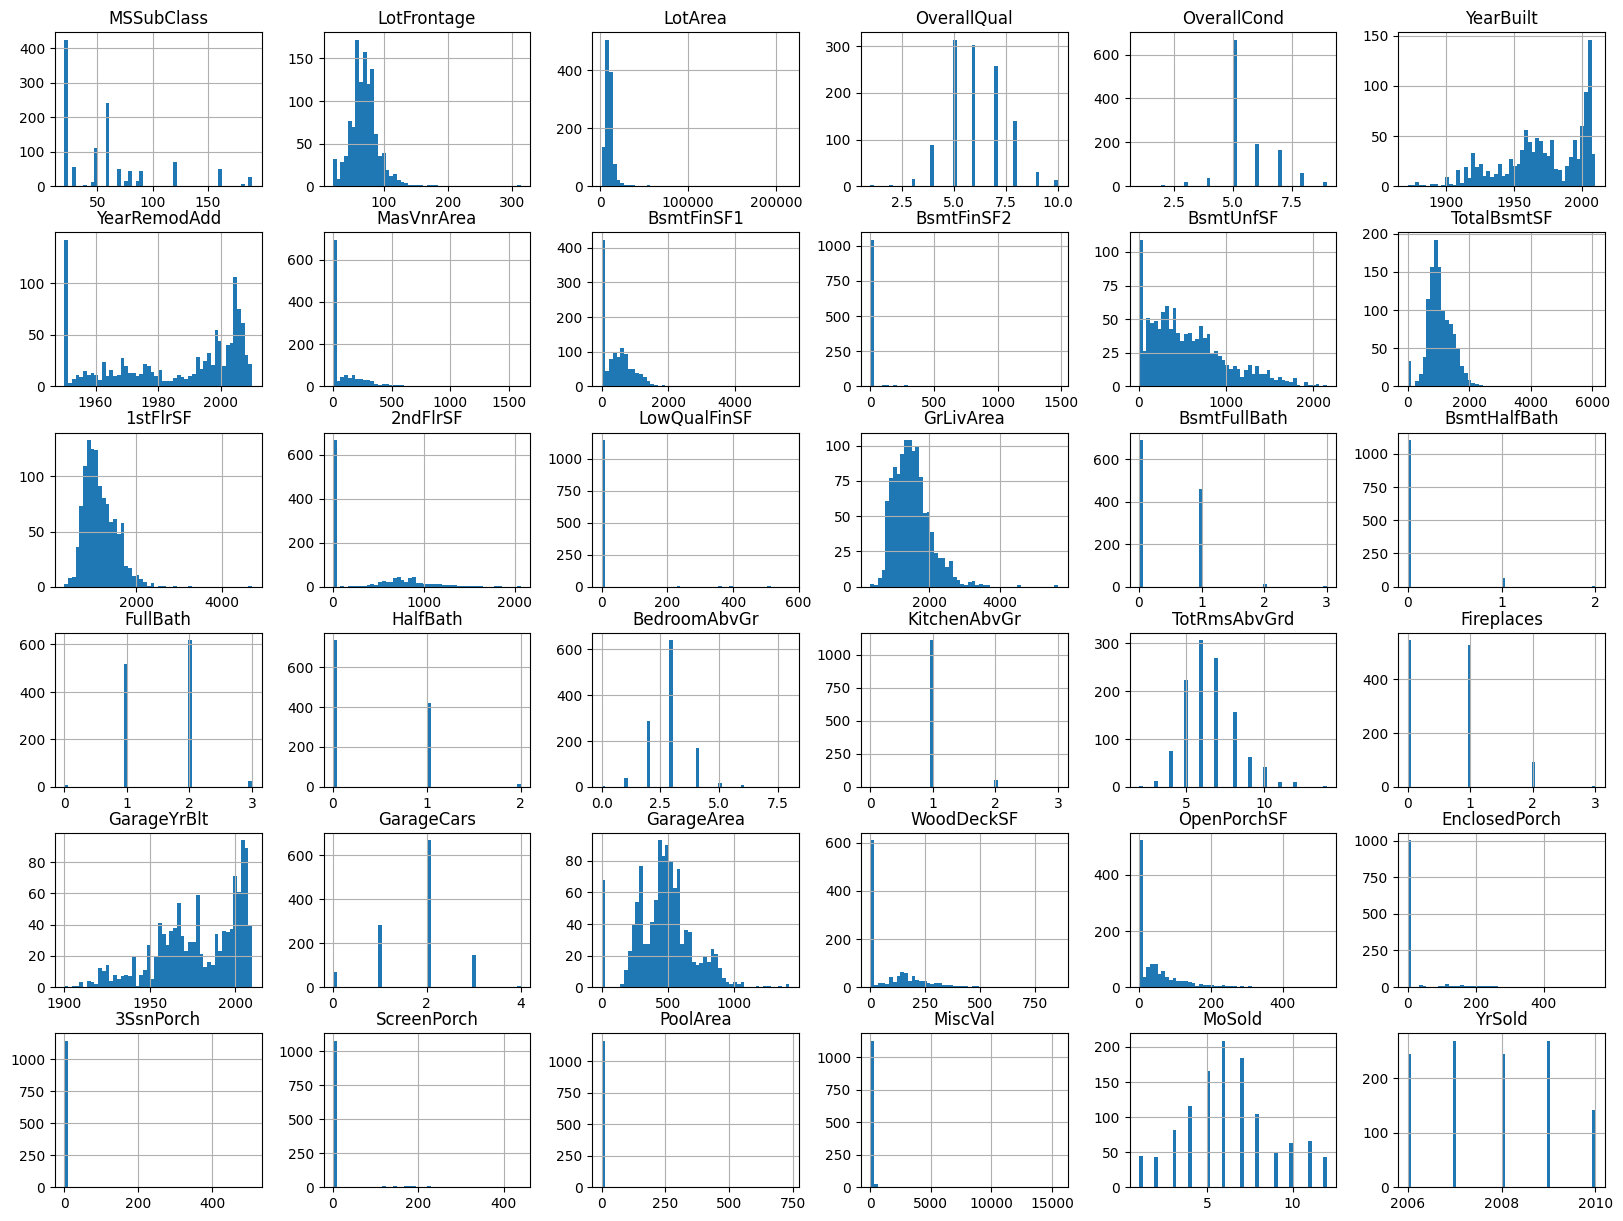

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
x_train.hist(bins=50, figsize=(20,15))

plt.show()

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch


In [35]:
# Load the dataset
reviews_df = pd.read_csv('sentiment_movie_review.csv')

# Separate reviews and sentiments
reviews = reviews_df['Review Title'].values
sentiments = reviews_df['sentiment_category'].apply(lambda x: 1 if x == 'positive' else 0).values

# Split data into training and testing sets
reviews_train, reviews_test, sentiments_train, sentiments_test = train_test_split(reviews, sentiments, test_size=0.2, random_state=42)


In [36]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [37]:
# Tokenize and encode the reviews
train_encodings = tokenizer(list(reviews_train), padding=True, truncation=True, return_tensors='pt', max_length=256)
test_encodings = tokenizer(list(reviews_test), padding=True, truncation=True, return_tensors='pt', max_length=256)


In [38]:
# Create PyTorch datasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(sentiments_train, dtype=torch.long))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(sentiments_test, dtype=torch.long))


In [39]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # 2 for binary classification

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Evaluate the model
model.eval()
predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=1)
        predicted_labels = torch.argmax(probabilities, dim=1)
        predictions.extend(predicted_labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(sentiments_test, predictions)
precision = precision_score(sentiments_test, predictions)
recall = recall_score(sentiments_test, predictions)
f1 = f1_score(sentiments_test, predictions)

In [44]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
